In [1]:
import numpy as np
from svm import *

In [2]:
def load_data(fname):
    """
    载入数据。
    """
    with open(fname, 'r') as f:
        data = []
        line = f.readline()
        for line in f:
            line = line.strip().split()
            x1 = float(line[0])
            x2 = float(line[1])
            t = int(line[2])
            data.append([x1, x2, t])
        return np.array(data)


def show_data(fname):
    data = load_data(fname)
    X1, X2, y = data[:, 0], data[:, 1], data[:, 2]
    plt.scatter(X1, X2, c=y)

In [3]:
    # 载入数据，实际实用时将x替换为具体名称
    train_file = 'data/train_kernel.txt'
    test_file = 'data/test_kernel.txt'
    data_train = load_data(train_file)  # 数据格式[x1, x2, t]
    data_test = load_data(test_file)
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]

In [4]:
def compare_models(models, names, train, test):
    X, t = train[:, :2], train[:, 2]
    X_test, t_test = test[:, :2], test[:, 2]
    print('(train accuracy, test accuracy)')
    for (model, name) in zip(models, names):
        model.train(data_train)
        pred = model.predict(X)
        train_acc = eval_acc(t, pred)
        pred = model.predict(x_test)
        test_acc = eval_acc(t_test, pred)
        print(name + ': ({}, {})'.format(train_acc, test_acc))

# Test kernel

In [5]:
train_file = 'data/train_kernel.txt'
test_file = 'data/test_kernel.txt'
data_train = load_data(train_file)  # 数据格式[x1, x2, t]
data_test = load_data(test_file)
names = ('Gaussian', 'Polynomial', 'Linear')
models = (SVM(C=1, kernel=k) for k in ('g', 'p', 'l'))
compare_models(models, names, data_train, data_test)

(train accuracy, test accuracy)
Gaussian: (1.0, 0.95)
Polynomial: (0.985, 0.98)
Linear: (0.81, 0.81)


### Try different polynomial kernel

In [6]:
models = []
names = []
# power 2 -> power 4
for i in range(2, 5):
    models.append(SVM(C=1, kernel='p', power=i))
    names.append('poly ' + str(i))
compare_models(models, names, data_train, data_test)

(train accuracy, test accuracy)
poly 2: (0.985, 0.98)
poly 3: (1.0, 0.975)
poly 4: (0.765, 0.805)


# Linear

In [7]:
train_file = 'data/train_linear.txt'
test_file = 'data/test_linear.txt'
train = load_data(train_file)
test = load_data(test_file)
test_X, test_y = test[:, 0:2], test[:, 2]

In [8]:
linear = Linear()
logistic = Logistic()
clf = SVM(loss='hinge', kernel='l')

In [9]:
linear.train(train, epochs=200, lr=0.0001, show_loss=False)

pred = linear.predict(train[:, :2])
print(eval_acc(train[:, 2], pred))
test_y_pred = linear.predict(test_X)
print(eval_acc(test_y, test_y_pred))

0.96
0.98


In [10]:
logistic.train(train, lr=0.005, epochs=200, show_loss=False)
pred = logistic.predict(train[:, :2])
print(eval_acc(train[:, 2], pred))
pred_y = logistic.predict(test_X)
print(eval_acc(test_y, pred_y))

0.95
0.96


0, loss: 31460.67102084167
100, loss: 106.94414842162846
200, loss: 81.40917646135607
300, loss: 79.84965377765323
400, loss: 78.29320253784894
500, loss: 76.7336860864895
600, loss: 75.17724107921177
700, loss: 73.61773086023241
800, loss: 72.06188154125878
900, loss: 70.50780370172721
Final loss: 68.96941601432519


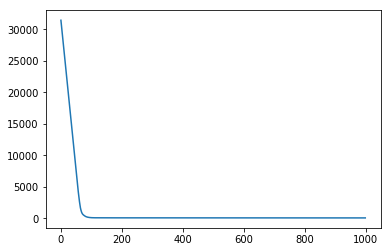

In [11]:

clf.train(train, epochs=1000, lr=0.001, l=0.001, show_loss=True)


In [12]:
pred = clf.predict(train[:, :2])
print(eval_acc(train[:, 2], pred))
pred = clf.predict(test_X)
print(eval_acc(test_y, pred))

0.955
0.96


# Multi-class SVM

In [13]:
# 载入数据，实际实用时将x替换为具体名称
train_file = 'data/train_multi.txt'
test_file = 'data/test_multi.txt'
data_train = load_data(train_file)  # 数据格式[x1, x2, t]
data_test = load_data(test_file)
x_test = data_test[:, :2]
t_test = data_test[:, 2]

In [14]:
mclf = multiSVM(n_classes=3, decision_function_shape='ovo')
mclf.train(data_train)
pred = mclf.predict(x_test)
eval_acc(pred, t_test)

0.9666666666666667

In [18]:
models = (
    multiSVM(C=100, n_classes=3, decision_function_shape='ovr', kernel='g'),
    multiSVM(C=100, n_classes=3, decision_function_shape='ovo', kernel='g'),
    
    multiSVM(C=100, n_classes=3, decision_function_shape='ovr', kernel='p'),
    multiSVM(C=100, n_classes=3, decision_function_shape='ovo', kernel='p'),
    
    multiSVM(C=100, n_classes=3, decision_function_shape='ovr', kernel='l'),
    multiSVM(C=100, n_classes=3, decision_function_shape='ovo', kernel='l')
)

for model in models:
    model.train(data_train)
    pred = model.predict(data_train[:, :2])
    print(eval_acc(pred, data_train[:, 2]), end='\t')
    pred = model.predict(x_test)
    print(eval_acc(pred, t_test))

1.0	0.91
1.0	0.9566666666666667
0.98	0.96
0.9833333333333333	0.9766666666666667
0.97	0.9666666666666667
0.9833333333333333	0.9833333333333333
